In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import numpy as np
import json
# from dotmap import DotMap
# import json
plt.style.use('~/Documents/scripts-and-settings/mylib-python/matplotlibrc')
from joblib import Parallel, delayed
import re

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg','pdf')

/tmp/ipykernel_15150/3037388059.py:8: MatplotlibDeprecationWarning: 
The mpl_toolkits.legacy_colorbar rcparam was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Please update your matplotlibrc.
  plt.style.use('~/Documents/scripts-and-settings/mylib-python/matplotlibrc')


In [ ]:
with open("../keep_results/gaussian/gaussian_width_0/system_profile.dat",'r') as file:
   systemProfile = file.read()
file.close()
totalN      =float(re.findall(r"^totalN\s=\s(\d+.\d+)?",systemProfile, re.MULTILINE)[0])
# chi         =float(re.findall(r"^chi\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# eta         =float(re.findall(r"^eta\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# J           =float(re.findall(r"^J\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# A_nri       =float(re.findall(r"^A_nri\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
Temp        =float(re.findall(r"^Temp\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# v0          =float(re.findall(r"^init vel mag\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
latt_c      =float(re.findall(r"^latt const\(a\)\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
# Omega_range =float(re.findall(r"^vchk interaction range\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
lbox_x      =float(re.findall(r"^lbox_x\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
lbox_y      =float(re.findall(r"^lbox_y\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])

log_path1 = "../keep_results/gaussian/gaussian_width_0/log"
log_path2 = "../keep_results/gaussian/gaussian_width_0.006/log"
log_path3 = "../keep_results/gaussian/gaussian_width_0.009/log"
logData1 = np.loadtxt(log_path1,unpack=True,skiprows=1);
logData2 = np.loadtxt(log_path2,unpack=True,skiprows=1);
logData3 = np.loadtxt(log_path3,unpack=True,skiprows=1);
lx1 = lbox_x/2.0;
lx2 = lx1;
ly1 = lbox_y/2.0;
ly2 = ly1;
N_config = int(logData1[0].size)
# N_config = 3500

# for t in range(1,N_config,1):
def get_plots(t):
   plt.style.use('/Users/pankaj/Documents/scripts-and-settings/mylib-python/matplotlibrc')
   # fig = plt.figure(figsize=(26,13))
   # gs =  mpl.gridspec.GridSpec(nrows=7,ncols=4,figure=fig,hspace=0.9,width_ratios=(1,1,1,0.05))
   # ax1 = fig.add_subplot(gs[0:5,0:4],box_aspect=1)
   # ax11 = fig.add_subplot(gs[0:5,2],box_aspect=20)
   # ax2 = fig.add_subplot(gs[5:7,:])

   # fig = plt.figure(figsize=(13,8))
   # gs =  mpl.gridspec.GridSpec(nrows=8,ncols=3,figure=fig,hspace=0.002,width_ratios=(1,1,0.05))
   # ax1 = fig.add_subplot(gs[0:5,0:1],box_aspect=1)
   # ax2 = fig.add_subplot(gs[0:5,1:2],box_aspect=1)
   # ax21 = fig.add_subplot(gs[0:5,2],box_aspect=20)
   # ax3 = fig.add_subplot(gs[6:8,:])

   fig = plt.figure(figsize=(26,13))
   gs =  mpl.gridspec.GridSpec(nrows=3,ncols=4,figure=fig, width_ratios=(1,1,1,0.05))
   ax1 = fig.add_subplot(gs[0:2,0],box_aspect=1)
   ax2 = fig.add_subplot(gs[0:2,1],box_aspect=1)
   ax3 = fig.add_subplot(gs[0:2,2],box_aspect=1)
   ax4 = fig.add_subplot(gs[0:2,3],box_aspect=20)
   ax5 = fig.add_subplot(gs[2,:])

   
   fig_title ="Tri--Rect: N = {0:d}, $T =$ {1:.4f}, rate = {2:.4f} per 10k sim steps".format(int(totalN),Temp,0.02)
   # fig_title ="Tri--Rect: N = {0:d}, $T =$ {1:.4f}, $h_{{\chi}}=\mathcal{{N}}$({2:.1f}x$10^{{-4}}$,{3:.1f}x$10^{{-4}}$ )".format(int(totalN),Temp,3.5,1)
   fig.suptitle(fig_title)
   ax1.set_title("1: $h_{{\chi}}=\mathcal{{N}}$({0:.1f}x$10^{{-2}}$,{1:.1f} )".format(-1,0))
   ax2.set_title("2: $h_{{\chi}}=\mathcal{{N}}$({0:.1f}x$10^{{-2}}$,{1:.1f}x$10^{{-3}}$ )".format(-1,6))
   ax3.set_title("3: $h_{{\chi}}=\mathcal{{N}}$({0:.1f}x$10^{{-2}}$,{1:.1f}x$10^{{-3}}$ )".format(-1,9))
   


   xlabel = "$x$"
   ylabel = "$y$"
   ax1.set_ylabel(ylabel)
   ax1.set_xlabel(xlabel)
   ax2.set_ylabel(ylabel)
   ax2.set_xlabel(xlabel)
   ax3.set_ylabel(ylabel)
   ax3.set_xlabel(xlabel)
   ax5.set_ylabel("$X$")
   ax5.set_xlabel("$t$")



   ax1_xlim = [-lx1-latt_c,lx2+latt_c]
   ax1_ylim = [-ly1-latt_c,ly2+latt_c]
   ax5_xlim = [0,N_config]
   ax5_ylim = [0.03,2.0]
   ax5.set_yscale('log')


   ax1.set_xlim(ax1_xlim) 
   ax1.set_ylim(ax1_ylim)
   ax2.set_xlim(ax1_xlim) 
   ax2.set_ylim(ax1_ylim)
   ax3.set_xlim(ax1_xlim) 
   ax3.set_ylim(ax1_ylim)
   ax5.set_xlim(ax5_xlim) 
   ax5.set_ylim(ax5_ylim)

   # ax1.xaxis.set_ticks([-5,-3,0,3,5])
   # ax1.yaxis.set_ticks([-5,-3,0,3,5])
   # ax2.yaxis.set_ticks([0,0.5,1,1.5])
   
   # ax1.tick_params(axis='both', which='major', labelsize=20)
   # ax2.tick_params(axis='both', which='major', labelsize=20)

   vmin_ = 0
   vmax_ =  2

   config_path1 = "../keep_results/gaussian/gaussian_width_0/time/new_cordinates_{}.dat".format(t)
   config_path2 = "../keep_results/gaussian/gaussian_width_0.006/time/new_cordinates_{}.dat".format(t)
   config_path3 = "../keep_results/gaussian/gaussian_width_0.009/time/new_cordinates_{}.dat".format(t)
   data1 = np.loadtxt(config_path1,unpack=True);
   data2 = np.loadtxt(config_path2,unpack=True);
   data3 = np.loadtxt(config_path3,unpack=True);

   cm = plt.cm.get_cmap('plasma')

   sc1 = ax1.scatter(data1[1],data1[2], s=90,edgecolors='gray', c=data1[7],vmin=vmin_, vmax=vmax_, cmap=cm)
   sc2 = ax2.scatter(data2[1],data2[2], s=90,edgecolors='gray',c=data2[7],vmin=vmin_, vmax=vmax_, cmap=cm)
   sc3 = ax3.scatter(data3[1],data3[2], s=90,edgecolors='gray', c=data3[7],vmin=vmin_, vmax=vmax_, cmap=cm)
   plt.colorbar(sc3,cax=ax4,format='%0.01f', label=r'$\chi_{i}$')

   # extent= -lx1,lx2,-ly1,ly2
   # sc=ax2.imshow((data[7].reshape(int(np.sqrt(data.shape[1])),int(np.sqrt(data.shape[1])))),origin='lower',cmap=cm,extent=extent,vmin=vmin_,vmax=vmax_,interpolation='lanczos',aspect='auto')
   # plt.colorbar(sc,cax=ax21,format='%0.01f', label=r'$\chi_{i}$')

   ax5.plot(logData1[0],logData1[4],'--',c="C0",linewidth=2)
   ax5.plot(logData1[0,0:t],logData1[4,0:t],'-',c="C0",linewidth=2.5, label='1')

   ax5.plot(logData2[0],logData2[4],':',c="C1",linewidth=2)
   ax5.plot(logData2[0,0:t],logData2[4,0:t],'-',c="C1",linewidth=2.5,label='2')

   ax5.plot(logData3[0],logData3[4],'-.',c="C2",linewidth=2)
   ax5.plot(logData3[0,0:t],logData3[4,0:t],'-',c="C2",linewidth=2.5,label='3')
   
   ax5.plot([t,t], [0, 3],color='k', linestyle='-', linewidth=2.0);
   # ax5.plot([0,N_config], [1, 1],color='k', linestyle='--', linewidth=0.5);
   ax5.legend(ncol=1,columnspacing=0.35,markerscale=2,handlelength=1,loc=1)
   
   plt.tight_layout()
   fig.savefig('../keep_results/gaussian/pdf_all_widths/frame_{}.pdf'.format(t), transparent=False)
   return t
Parallel(n_jobs=4)(delayed(get_plots)(i) for i in range(1,6000,1))
# ( N=3;for pdf in *.pdf; do  ((i=i%N)); ((i++==0)) && wait; sips -s format png --out  "${pdf%%.*}.png" "$pdf" & done; )
# ffmpeg -r 30 -i frame_%d.png -c:v libx264 -pix_fmt yuv420p -r 30 1.mp4 

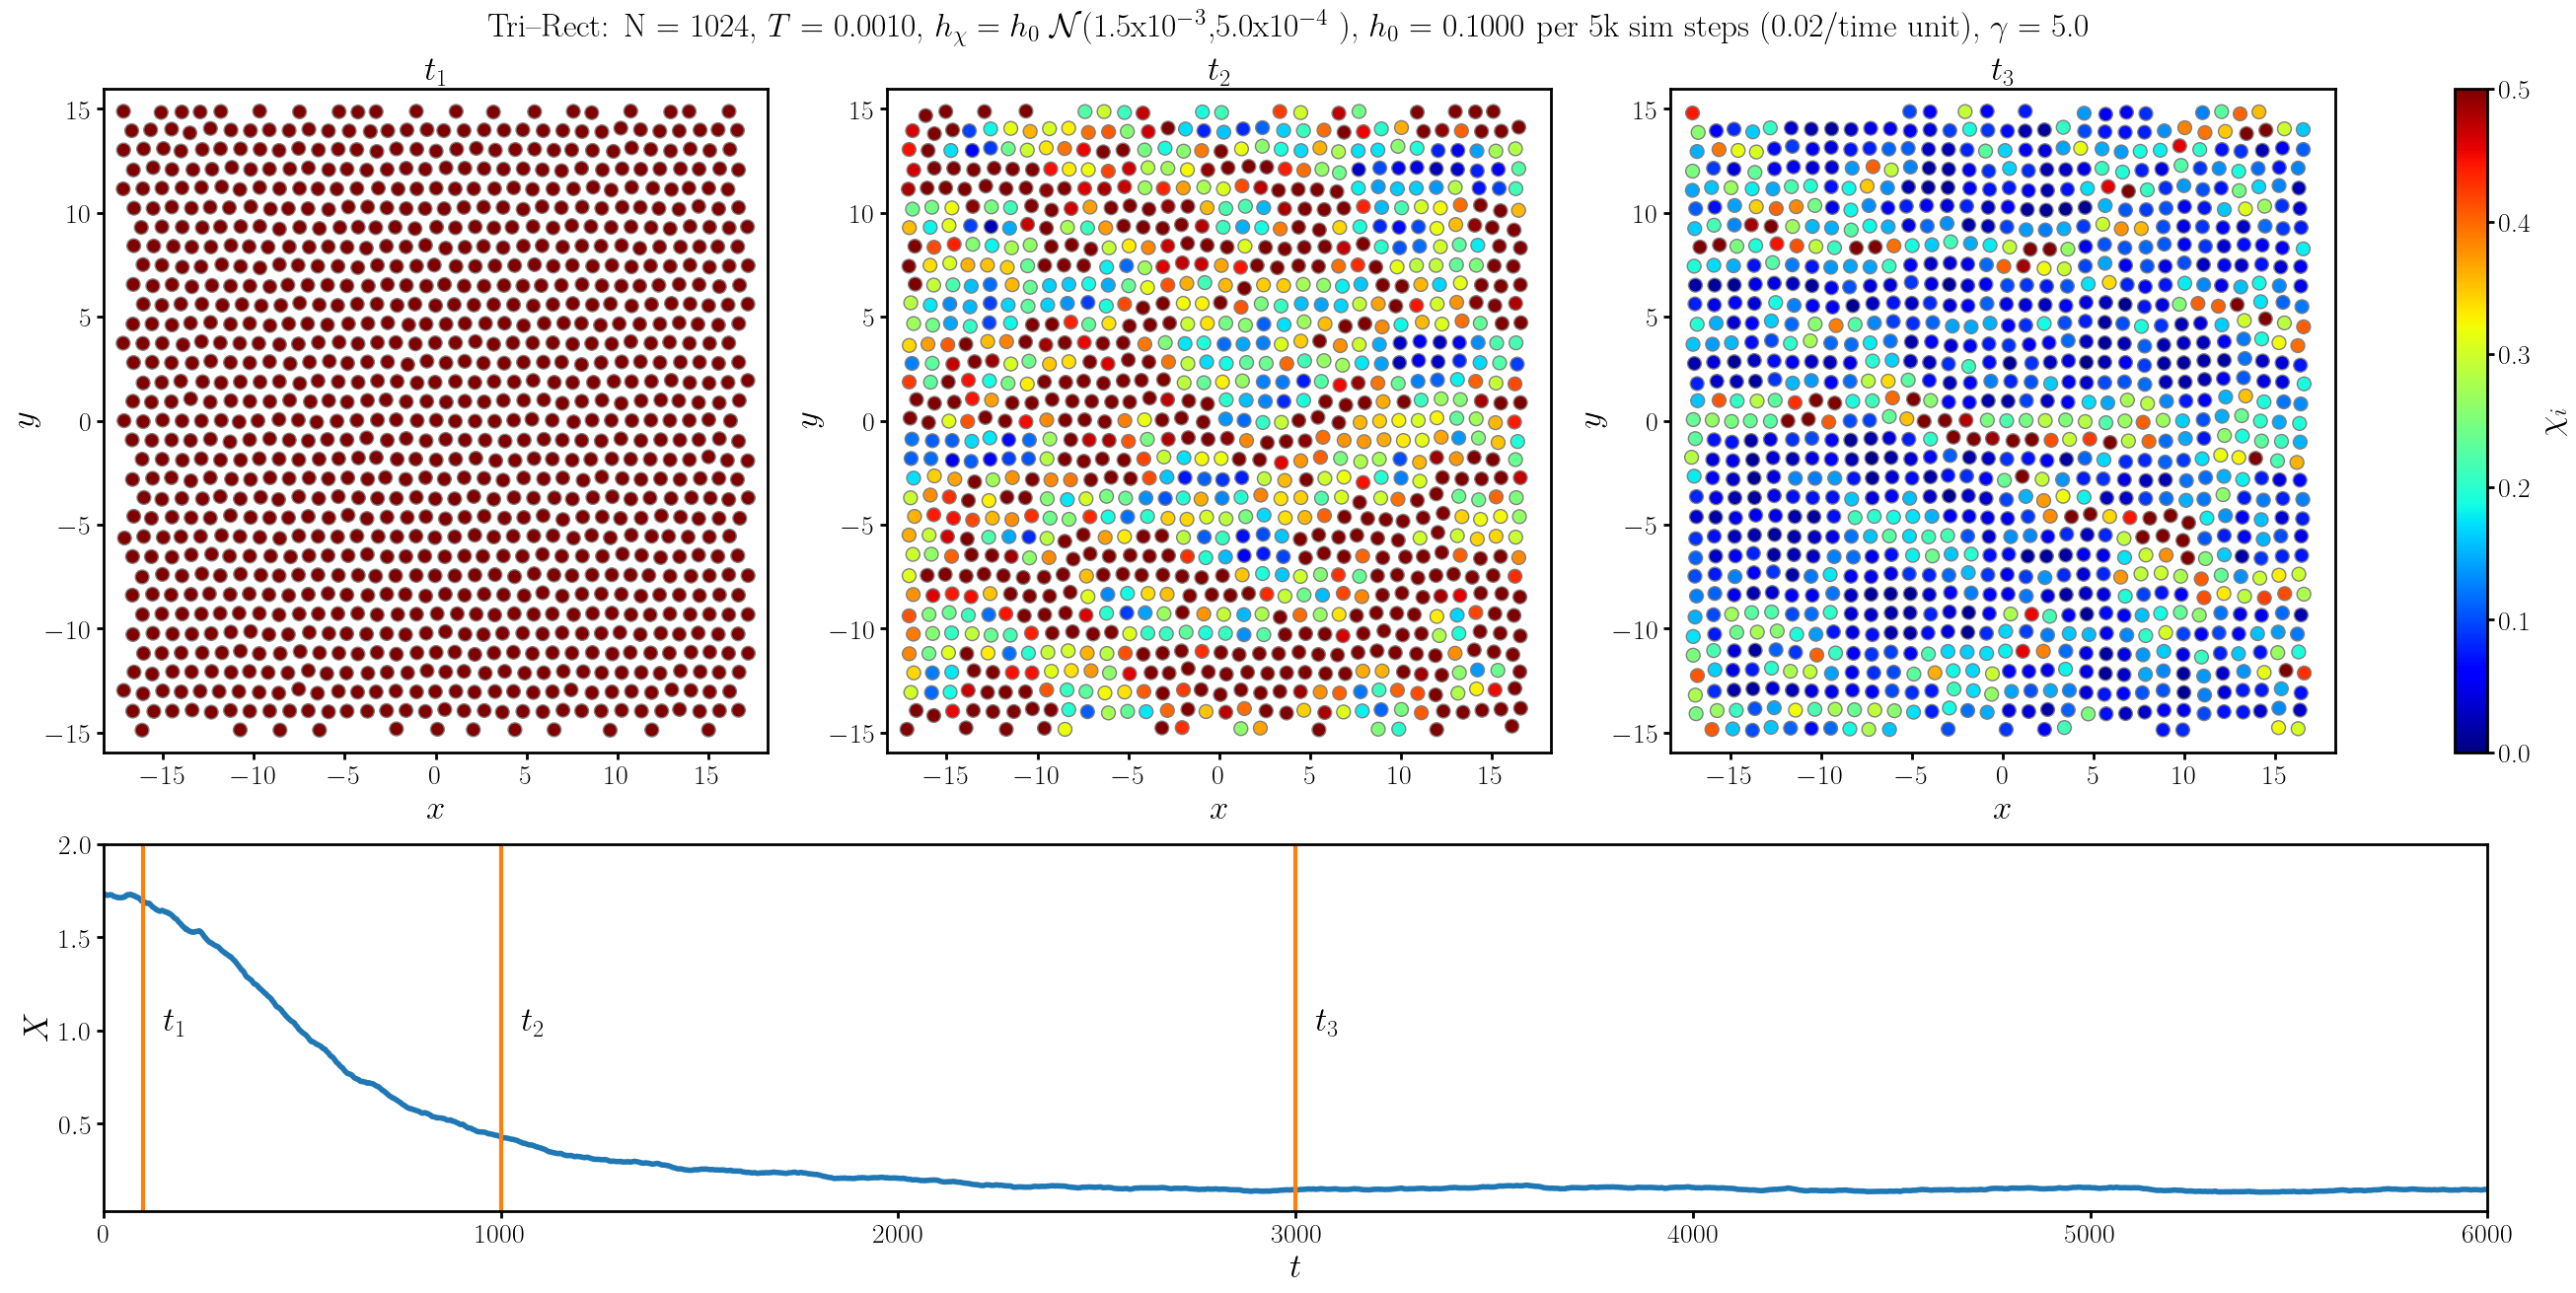

In [99]:
# Read system profile

with open("../../../../results/saswati/MD_hchi/gaussian_1024_ramp/system_profile.dat",'r') as file:
   systemProfile = file.read()
file.close()
totalN      =float(re.findall(r"^totalN\s=\s(\d+.\d+)?",systemProfile, re.MULTILINE)[0])
Temp        =float(re.findall(r"^Temp\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
latt_c      =float(re.findall(r"^latt const\(a\)\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
lbox_x      =float(re.findall(r"^lbox_x\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
lbox_y      =float(re.findall(r"^lbox_y\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])
N_config    =float(re.findall(r"^total configs generated\s=\s(\d+.\d+)?", systemProfile, re.MULTILINE)[0])


# define figure canvas
fig = plt.figure(constrained_layout=True, figsize=(26,13))
gs =  mpl.gridspec.GridSpec(nrows=3,ncols=4,figure=fig, width_ratios=(1,1,1,0.05))
ax1 = fig.add_subplot(gs[0:2,0],box_aspect=1)
ax2 = fig.add_subplot(gs[0:2,1],box_aspect=1)
ax3 = fig.add_subplot(gs[0:2,2],box_aspect=1)
ax4 = fig.add_subplot(gs[0:2,3],box_aspect=20)
ax5 = fig.add_subplot(gs[2,:])

#figure titles
fig_title ="Tri--Rect: N = {0:d}, $T =$ {1:.4f}, $h_{{\chi}}=h_0~\mathcal{{N}}$({2:.1f}x$10^{{-3}}$,{3:.1f}x$10^{{-4}}$ ), $h_0$ = {4:.4f} per 5k sim steps (0.02/time unit), $\gamma = $ {5:.1f}".format(int(totalN),Temp,1.5,5,0.1,5)
fig.suptitle(fig_title)
ax1.set_title("$t_1$")
ax2.set_title("$t_2$")
ax3.set_title("$t_3$")

#figure labels
xlabel = "$x$"
ylabel = "$y$"
ax1.set_ylabel(ylabel)
ax1.set_xlabel(xlabel)
ax2.set_ylabel(ylabel)
ax2.set_xlabel(xlabel)
ax3.set_ylabel(ylabel)
ax3.set_xlabel(xlabel)
ax5.set_ylabel("$X$")
ax5.set_xlabel("$t$")

# plot limits
lx1 = lbox_x/2.0;
lx2 = lx1;
ly1 = lbox_y/2.0;
ly2 = ly1;
ax1_xlim = [-lx1-latt_c,lx2+latt_c]
ax1_ylim = [-ly1-latt_c,ly2+latt_c]
ax5_xlim = [0,N_config]
ax5_ylim = [0.03,2.0]
ax1.set_xlim(ax1_xlim) 
ax1.set_ylim(ax1_ylim)
ax2.set_xlim(ax1_xlim) 
ax2.set_ylim(ax1_ylim)
ax3.set_xlim(ax1_xlim) 
ax3.set_ylim(ax1_ylim)
ax5.set_xlim(ax5_xlim) 
ax5.set_ylim(ax5_ylim)

#load data to plot 1
t1=100
t2=1000
t3=3000
config_path1 = "../results_in_here/gaussian_1024_ramp/time/new_cordinates_{}.dat".format(t1)
config_path2 = "../results_in_here/gaussian_1024_ramp/time/new_cordinates_{}.dat".format(t2)
config_path3 = "../results_in_here/gaussian_1024_ramp/time/new_cordinates_{}.dat".format(t3)
data1 = np.loadtxt(config_path1,unpack=True);
data2 = np.loadtxt(config_path2,unpack=True);
data3 = np.loadtxt(config_path3,unpack=True);

vmin_ = 0
vmax_ = 0.5
cm = plt.cm.get_cmap('jet')

sc1 = ax1.scatter(data1[1],data1[2], s=100,edgecolors='gray', c=data1[7],vmin=vmin_, vmax=vmax_, cmap=cm)
sc2 = ax2.scatter(data2[1],data2[2], s=100,edgecolors='gray',c=data2[7],vmin=vmin_, vmax=vmax_, cmap=cm)
sc3 = ax3.scatter(data3[1],data3[2], s=100,edgecolors='gray', c=data3[7],vmin=vmin_, vmax=vmax_, cmap=cm)
plt.colorbar(sc3,cax=ax4,format='%0.01f', label=r'$\chi_{i}$')

#load data to plot 2
log_path1 = "../results_in_here/gaussian_1024_ramp/log"
logData1 = np.loadtxt(log_path1,unpack=True,skiprows=1);
ax5.plot(logData1[0],logData1[4],'-',c="C0",linewidth=4)
ax5.plot([t1,t1], [0, 3],color='C1', linestyle='-', linewidth=3.0);
ax5.plot([t2,t2], [0, 3],color='C1', linestyle='-', linewidth=3.0);
ax5.plot([t3,t3], [0, 3],color='C1', linestyle='-', linewidth=3.0);
ax5.text(t1+50,1,r"$t_1$",size=25, weight='bold')
ax5.text(t2+50,1,r"$t_2$",size=25, weight='bold')
ax5.text(t3+50,1,r"$t_3$",size=25, weight='bold')

fig.savefig('../results_in_here/gaussian_1024_ramp/config.pdf', transparent=False)
